In [1]:
pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 7.7 MB/s eta 0:00:00


In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

In [3]:
food_weight = ctrl.Antecedent(np.arange(0, 1001, 1), 'food_weight')
food_type = ctrl.Antecedent(np.arange(0, 11, 1), 'food_type')
food_temp = ctrl.Antecedent(np.arange(0, 61, 1), 'food_temp')
cooking_time = ctrl.Consequent(np.arange(0, 16, 0.5), 'cooking_time')
power_level = ctrl.Consequent(np.arange(0, 101, 1), 'power_level')

In [4]:
food_weight['light'] = fuzz.trimf(food_weight.universe, [0, 0, 400])
food_weight['medium'] = fuzz.trimf(food_weight.universe, [200, 500, 800])
food_weight['heavy'] = fuzz.trimf(food_weight.universe, [600, 1000, 1000])

food_type['soft'] = fuzz.trimf(food_type.universe, [0, 0, 5])
food_type['medium'] = fuzz.trimf(food_type.universe, [0, 5, 10])
food_type['hard'] = fuzz.trimf(food_type.universe, [5, 10, 10])

food_temp['cold'] = fuzz.trimf(food_temp.universe, [0, 0, 20])
food_temp['warm'] = fuzz.trimf(food_temp.universe, [10, 25, 40])
food_temp['hot'] = fuzz.trimf(food_temp.universe, [30, 60, 60])

cooking_time['short'] = fuzz.trimf(cooking_time.universe, [0, 0, 5])
cooking_time['medium'] = fuzz.trimf(cooking_time.universe, [3, 7, 11])
cooking_time['long'] = fuzz.trimf(cooking_time.universe, [9, 15, 15])

power_level['low'] = fuzz.trimf(power_level.universe, [0, 0, 40])
power_level['medium'] = fuzz.trimf(power_level.universe, [30, 60, 80])
power_level['high'] = fuzz.trimf(power_level.universe, [70, 100, 100])

In [5]:
rule1 = ctrl.Rule(food_weight['light'], cooking_time['short'])
rule2 = ctrl.Rule(food_weight['medium'], cooking_time['medium'])
rule3 = ctrl.Rule(food_weight['heavy'], cooking_time['long'])
rule4 = ctrl.Rule(food_type['soft'], power_level['low'])
rule5 = ctrl.Rule(food_type['medium'], power_level['medium'])
rule6 = ctrl.Rule(food_type['hard'], power_level['high'])
rule7 = ctrl.Rule(food_temp['cold'], cooking_time['long'])
rule8 = ctrl.Rule(food_temp['warm'], cooking_time['medium'])
rule9 = ctrl.Rule(food_temp['hot'], cooking_time['short'])
rule10 = ctrl.Rule(food_weight['heavy'] & food_type['hard'] & food_temp['cold'],
                  (cooking_time['long'], power_level['high']))
rule11 = ctrl.Rule(food_weight['medium'] & food_type['soft'] & food_temp['warm'],
                  (cooking_time['medium'], power_level['low']))
rule12 = ctrl.Rule(food_weight['light'] & food_type['medium'] & food_temp['hot'],
                  (cooking_time['short'], power_level['medium']))


In [7]:
microwave_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6,
                                    rule7, rule8, rule9, rule10, rule11, rule12])
microwave = ctrl.ControlSystemSimulation(microwave_ctrl)

In [8]:
microwave.input['food_weight'] = 750
microwave.input['food_type'] = 8
microwave.input['food_temp'] = 5

microwave.compute()

Thời gian nấu: 11.4 phút
Mức công suất: 70.3%


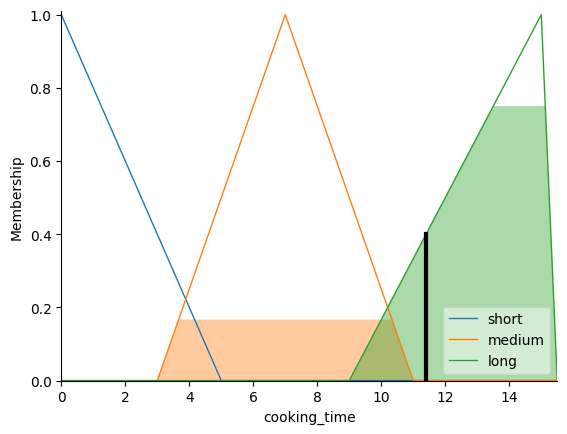

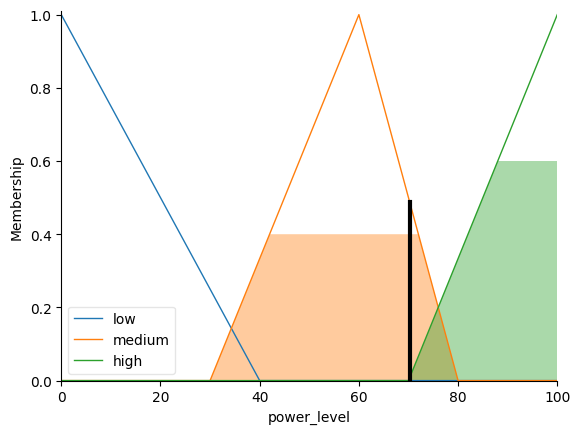

In [9]:
print(f"Thời gian nấu: {microwave.output['cooking_time']:.1f} phút")
print(f"Mức công suất: {microwave.output['power_level']:.1f}%")

cooking_time.view(sim=microwave)
power_level.view(sim=microwave)